In [1]:
%reload_ext autoreload
%autoreload 2
from dimensionality_reduction_details import *

In [2]:
# Reading the csv file
dataset = load_input_data_from_file("./Supermarket_Items.csv")
dataset.head()

dataset size: [ 8523 rows, 12 columns]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,NaN,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,NaN,High,Tier 3,Supermarket Type1,994.7052


## Data Imputation steps


In [3]:
perform_data_imputation(dataset)

count_missing_cells(dataset)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Irrelevant feature elimination

In [4]:
dataset.shape

(8523, 12)

In [5]:
# drop the target variable, and features having no role in Outlet_Sales
dataset = drop_cols(dataset, cols=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
dataset.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999.0,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009.0,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1985.0,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998.0,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1985.0,High,Tier 3,Supermarket Type1


In [6]:
dataset.shape

(8523, 9)

### Columns with categorical values (e.g., High, Medium, Low) need to be converted into numeric value based columns one for each category value.

In [7]:
# converting string values to numeric
dataset = convert_discrete_to_numeric_cols(dataset)
print (dataset.shape)

(8523, 32)


In [8]:
dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1985.0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998.0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1985.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
# ## Principle component Analysis
do_pca (dataset, num_components=4)

dataset size: [ 8523 rows, 4 columns]


,principal component 1,principal component 2,principal component 3,principal component 4
0,108.811473,-1.263539,-3.736237,-0.250821
1,-92.724740,-11.452747,-6.711486,1.278770
2,0.621139,12.674642,4.544695,-0.376071
3,41.113180,-0.224730,6.267067,1.003796
4,-87.149386,12.577589,-3.872289,0.019724


In [10]:
compute_covariance()

cov(1, 2): 0.0000000000
cov(1, 3): 0.0000000000
cov(1, 4): 0.0000000000
cov(2, 3): 0.0000000000
cov(2, 4): -0.0000000000
cov(3, 4): 0.0000000000


In [11]:
compute_explained_variances()

Principal components,% Component-wise explained variance,% Cumulative explained variance
1,97.68,97.68
2,1.80,99.48
3,0.45,99.93
4,0.02,99.94


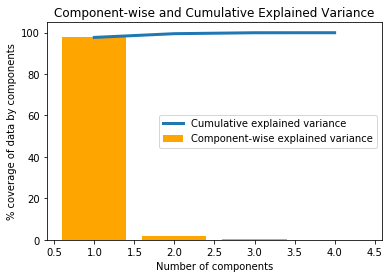

In [12]:
plot_component_wise_variance()
# We are able to explain around 99% variance in the dataset using 4 components